$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [63]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  eig_max = max(np.linalg.eig(A)[0])
  eig_min = min(np.linalg.eig(A)[0])
  #print(eig_max, eig_min)

In [64]:
#checking with an example
B = np.array([[3000,4],[4,2]])
find_condition_number(B)

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$

The Q matrix can be the hessian matrix $\nabla_{\mathbf{x}}g(y)$.

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

Since $D^k$ is diagonal it is the inverse of the hessian matrix of f(x) with non-diagonal elements being zero.

$\begin{aligned}
\mathbf{D}^k = \begin{bmatrix} \frac{1}{f_{x_1 x_1}} & 0\\ 0 & \frac{1}{f_{x_2 x_2}} \end{bmatrix}
\end{aligned}
$, where $f_{x_1 x_1} = \frac{\partial^2f(\mathbf{x})}{\partial x_1^2}$ and  $f_{x_2 x_2} = \frac{\partial^2f(\mathbf{x})}{\partial x_2^2}$

Based on the function given in this question, the matrix $\mathbf{D}^k$ comes out to be $\begin{bmatrix} \frac{1}{3000} & 0\\ 0 & \frac{1}{2} \end{bmatrix}$

Write code to find the matrix $\mathbf{D}^k$. 

In [65]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  return np.array([[1/3000,0],[0,1/2]])
  

In [66]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1500*x[0]**2 + 4*x[0]*x[1] + x[1]**2
  


In [67]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0]+4*x[1], 4*x[0]+2*x[1]])
  

In [68]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code 
  t1 = np.matmul(gradf,gradf)/2
  t2 = np.matmul(np.matmul(A,gradf),gradf)

  step_length = t1/t2
  
  return step_length
  

In [69]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  #Complete the code 
  alpha = alpha_start

  while evalf(x+alpha*-gradf) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-gradf):
    alpha = rho*alpha

  return alpha
  
  

In [88]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  #assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  
  
  #Complete the code 
  alpha = alpha_start

  while evalf(x+alpha*np.matmul(direction,(-gradf))) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),np.matmul(direction,-gradf)):
    alpha = rho*alpha

  return alpha

In [71]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [101]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  #Complete the code
  A = np.array([[1500,2],[2,1]])
  x = start_x
  g_x = evalg(x)

  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):
    if(line_search_type == EXACT_LINE_SEARCH):
      step_length = compute_steplength_exact(g_x, A)
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma)
    elif line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,g_x))
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, evalf(x)   


In [73]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  #Complete the code 
  x = start_x
  g_x = evalg(x)
  d_k = compute_D_k(x)

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, d_k, alpha_start, rho, gamma)

    x = np.subtract(x, np.multiply(step_length,np.matmul(d_k,g_x)))
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k = compute_D_k(x)

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, evalf(x)  

In [74]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [104]:
#check gradient descent with exact line search 
minimizer, no, objective = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print('Minimizer: ',minimizer,'\nNo. of iteration:',no,'\nMinimum function value: ',objective)

Minimizer:  [-7.44595231e-16  4.61544291e-13] 
No. of iteration: 14075 
Minimum function value:  2.1248011077913554e-25


In [103]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
minimizer, no, objective = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print('Minimizer: ',minimizer,'\nNo. of iteration:',no,'\nMinimum function value: ',objective)

Minimizer:  [-4.78532202e-16  4.53575301e-13] 
No. of iteration: 21985 
Minimum function value:  2.0520584176089396e-25


In [105]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
minimizer, no, objective = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print('Minimizer: ',minimizer,'\nNo. of iteration:',no,'\nMinimum function value: ',objective)

Minimizer:  [-2.31674405e-18  9.60515434e-16] 
No. of iteration: 16 
Minimum function value:  9.217397790469283e-31


**Answer 9**

In [102]:
alpha = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter_list = []
print('alpha' + '\t\tMinimizer' + '\t\t\t\tNo. of iterations' + '\t\t Objective Value')
for i in alpha:
  minimizer, no, objective = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i , rho, gamma)
  iter_list.append(no)
  print(i, '\t', minimizer, '\t\t', no, '\t\t\t', objective)

alpha		Minimizer				No. of iterations		 Objective Value
1 	 [-4.78532202e-16  4.53575301e-13] 		 21985 			 2.0520584176089396e-25
0.9 	 [-5.48799355e-16  4.71515450e-13] 		 15941 			 2.2174352131747877e-25
0.75 	 [-7.18643891e-16  4.89175378e-13] 		 6750 			 2.386610528547938e-25
0.6 	 [-6.07554226e-16  4.94036636e-13] 		 6887 			 2.43425264283868e-25
0.5 	 [-4.78532202e-16  4.53575301e-13] 		 21985 			 2.0520584176089396e-25
0.4 	 [-7.24091328e-16  4.84454819e-13] 		 11362 			 2.3407977615582728e-25
0.25 	 [-4.78532202e-16  4.53575301e-13] 		 21985 			 2.0520584176089396e-25
0.1 	 [-7.24091328e-16  4.84454819e-13] 		 11362 			 2.3407977615582728e-25
0.01 	 [-5.80852788e-16  4.86459735e-13] 		 5509 			 2.3601891237044125e-25


In [96]:
alpha = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter_list1 = []
print('alpha' + '\t\tMinimizer' + '\t\t\t\tNo. of iterations' + '\t\t Objective Value')
for i in alpha:
  minimizer, no, objective = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i , rho, gamma)
  iter_list1.append(no)
  print(i, '\t', minimizer, '\t\t', no, '\t\t\t', objective)

alpha		Minimizer				No. of iterations		 Objective Value
1 	 [-2.31674405e-18  9.60515434e-16] 		 16 			 9.217397790469283e-31
0.9 	 [-1.54825431e-16  5.99636318e-15] 		 21 			 6.819918471923904e-29
0.75 	 [-2.78273450e-16  1.07784868e-14] 		 32 			 2.203324807217381e-28
0.6 	 [-3.37385169e-16  1.30849588e-14] 		 47 			 3.2430059206322154e-28
0.5 	 [-2.51144512e-16  9.75949896e-15] 		 62 			 1.800539902805011e-28
0.4 	 [-3.26530890e-16  1.27315971e-14] 		 83 			 3.0539815808527928e-28
0.25 	 [-2.68853026e-16  1.05480788e-14] 		 147 			 2.0834135979657747e-28
0.1 	 [-3.34815103e-16  1.32481337e-14] 		 397 			 3.2592207464795465e-28
0.01 	 [-3.51028779e-16  1.39670836e-14] 		 4146 			 3.602998362211868e-28


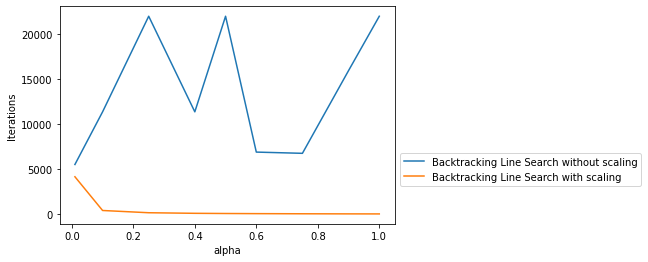

In [97]:
import matplotlib.pyplot as plt

plt.plot(alpha, iter_list, label = 'Backtracking Line Search without scaling')
plt.plot(alpha, iter_list1, label = 'Backtracking Line Search with scaling')
plt.legend(bbox_to_anchor=(1, 0.35))
plt.xlabel('alpha')
plt.ylabel('Iterations')
plt.show()

**Answer 10**

In [98]:
rho1 = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter_list2 = []
print('rho' + '\t\tMinimizer' + '\t\t\t\tNo. of iterations' + '\t\t Objective Value')
for i in rho1:
  minimizer, no, objective = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start , i, gamma)
  iter_list2.append(no)
  print(i, '\t', minimizer, '\t\t', no, '\t\t\t', objective)

rho		Minimizer				No. of iterations		 Objective Value
0.9 	 [-6.44686128e-16  4.90962904e-13] 		 127 			 2.404019351870065e-25
0.8 	 [-6.99968590e-16  4.40149178e-13] 		 1471 			 1.932338703071826e-25
0.75 	 [-7.15454842e-16  4.83616543e-13] 		 3135 			 2.332687511412074e-25
0.6 	 [-7.07691748e-16  4.70469643e-13] 		 15834 			 2.2076113616544364e-25
0.5 	 [-4.78532202e-16  4.53575301e-13] 		 21985 			 2.0520584176089396e-25
0.4 	 [-5.16461460e-16  4.67846629e-13] 		 20049 			 2.1831406770108246e-25
0.25 	 [-5.67128954e-16  4.70177132e-13] 		 24570 			 2.204823842206756e-25
0.1 	 [-4.35224428e-16  4.42644725e-13] 		 45435 			 1.9544788340231146e-25
0.01 	 [-6.03891924e-16  4.89972672e-13] 		 17463 			 2.394366854291179e-25


In [99]:
rho1 = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter_list3 = []
print('rho' + '\t\tMinimizer' + '\t\t\t\tNo. of iterations' + '\t\t Objective Value')
for i in rho1:
  minimizer, no, objective = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start , i, gamma)
  iter_list3.append(no)
  print(i, '\t', minimizer, '\t\t', no, '\t\t\t', objective)

rho		Minimizer				No. of iterations		 Objective Value
0.9 	 [-1.90920422e-16  3.38018326e-15] 		 14 			 6.352016622002106e-29
0.8 	 [-3.89959677e-18  7.65599523e-16] 		 15 			 5.970107943515186e-31
0.75 	 [-3.59593964e-18  9.57478862e-16] 		 15 			 9.223897999650174e-31
0.6 	 [-2.68496827e-18  1.53311688e-15] 		 15 			 2.3447954703965872e-30
0.5 	 [-2.31674405e-18  9.60515434e-16] 		 16 			 9.217397790469283e-31
0.4 	 [-2.10920879e-18  1.38155681e-15] 		 16 			 1.903716407388883e-30
0.25 	 [-6.9534609e-16  4.5561674e-13] 		 16 			 2.0704462793405916e-25
0.1 	 [-6.22892805e-16  4.51919078e-13] 		 23 			 2.0368685744853975e-25
0.01 	 [-5.88632151e-16  4.39928337e-13] 		 130 			 1.9302084997635662e-25


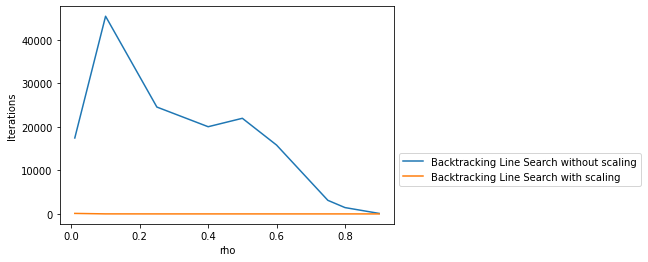

In [100]:
import matplotlib.pyplot as plt

plt.plot(rho1, iter_list2, label = 'Backtracking Line Search without scaling')
plt.plot(rho1, iter_list3, label = 'Backtracking Line Search with scaling')
plt.legend(bbox_to_anchor=(1, 0.35))
plt.xlabel('rho')
plt.ylabel('Iterations')
plt.show()

**Solution 7**

**Minimizer :** [-2.31674405e-18, 9.60515434e-16] ~ [0.0,0.0]

**Minimum Function Value :** 9.217397790469283e-31 ~ 0.0

The minimizer is obtained by differentiating $f(\textbf{x})$ wrt.  $\textbf{x}$ and equating it to $0$. We would get 
\begin{aligned}
\nabla f(\textbf{x}) = [3000x_1+4x_2, 4x_1 + 2x_2]^\top = 0 \\\implies 3000x_1+4x_2 &= 0\\
\text{and}\;\; 4x_1 + 2x_2 &= 0
\end{aligned}
Solving the above set of equations, we get the minimizer $(x_1,x_2) = (0,0)$ and $f(\textbf{x}) = f(x_1,x_2) = 0$.

**Solution 8**

**For exact line search**

Minimizer:  [-7.44595231e-16  4.61544291e-13]

No. of iteration: 14075 

Minimum function value:  2.1248011077913554e-25

**For backtracking line search (without scaling)**

Minimizer:  [-4.78532202e-16  4.53575301e-13]

No. of iteration: 21985 

Minimum function value:  2.0520584176089396e-25

**For backtracking line search (with scaling)**

Minimizer:  [-2.31674405e-18  9.60515434e-16]

No. of iteration: 16 

Minimum function value:  9.217397790469283e-31

**Observations:**

We can observe that backtracking line search with scaling converges best, followed by exact line search and then backtracking line search without scaling. Backtracking line search without scaling takes the largest no. of iterations, over 50 times that of exact line search and over 1250 times that of backtracking line search with scaling.

**Solution 9**

All the values has been recorded above and the plot for iterations v/s alpha values has also been plotted.

**Observations:**

* We can observe through the plot above that no. of iterations for Backtracking Line Search without scaling does not follow any usual pattern when $\alpha_0$
 reduces from 1.0 to 0.01. It always takes more no. of iterations than backtracking line search with scaling.

* Backtracking Line Search with scaling takes more no. of iterations as the value of $\alpha_0$
 reduces.

* We can also observe that when $\alpha_0$
 is 0.01, no. of iterations taken by both algorithms are very close.

* As for the minimizer, we can observe that backtracking with scaling gives better results for $\alpha_0 = 1.0$
 but gives similar results as that of backtracking without scaling as 
 reduces. Still backtracking with scaling always has an edge over backtracking without scaling in both minimizer and minimimum function value.

**Solution 10**

All the values has been recorded above and the plot for iterations v/s rho values has also been plotted.

**Observations:**

* We can observe through the plot above that no. of iterations for Backtracking Line Search without scaling tend to increase as $\rho$
 reduces. It always takes more no. of iterations than backtracking line search with scaling.

* No. of iterations for Backtracking Line Search with scaling increase very slowly as $\rho$
 reduces.

* As for the minimizer, we can observe that backtracking with scaling gives better results for $\rho >= 4.0$
 but gives similar results as that of backtracking without scaling for other values of $\rho$.